In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # >= 0.9

import warnings
warnings.filterwarnings('ignore')

sns.set(style='ticks', context='talk', color_codes=True)

In [2]:
mpl.rcParams.update({
    'figure.figsize': [10, 6],
    'legend.fontsize': 18,
    'lines.linewidth' : 5,
    'patch.linewidth': 2.2,
    'hatch.linewidth': 2,
    'xtick.direction': 'in',
    'ytick.direction': 'in'
})

In [4]:
from dataloader import *
sn_data = import_kaepora()
sn_data.head()

,v_siII,v_siII_err,z
kaepora,,,
2006td,10812.60,300.000,0.015880
1996z,12142.10,233.568,0.007575
1996x,11173.10,222.453,0.006945
1996c,10689.10,222.453,0.027000
2005m,8093.94,231.052,0.022000


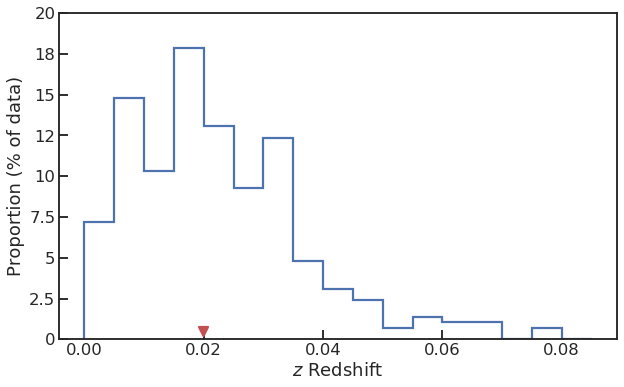

In [60]:
z_median = sn_data['z'].median()

bins = np.arange(0, 9, 0.5) / 100
plt.hist(sn_data['z'], bins=bins, histtype='step', density=True)
plt.scatter(z_median, 1, color='r', marker='v')
plt.xlabel('$z$ Redshift')
plt.ylabel('Proportion (% of data)')

plt.yticks(plt.yticks()[0], [f'{tick:.2g}' for tick in plt.yticks()[0] * 0.5]);

In [56]:
sn_data_with_z = sn_data[~sn_data['z'].isna()]
sn_data_with_z.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 2006td to 2007f
Data columns (total 3 columns):
v_siII        291 non-null float64
v_siII_err    282 non-null float64
z             291 non-null float64
dtypes: float64(3)
memory usage: 9.1+ KB


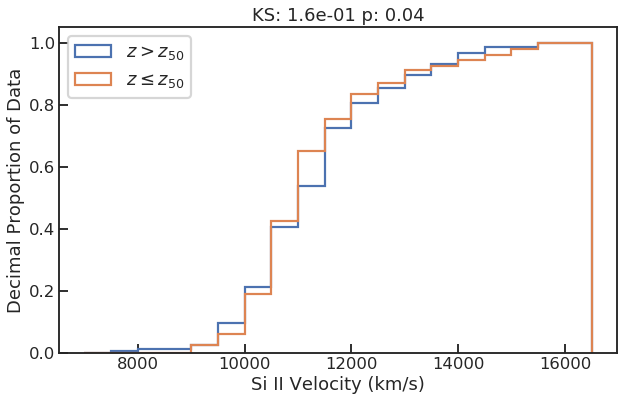

In [128]:
from scipy import stats

ks = stats.ks_2samp(sn_data_with_z['v_siII'][sn_data_with_z['z'] > z_median], sn_data_with_z['v_siII'][sn_data_with_z['z'] <= z_median])

bins = np.arange(7000, 17000, 500)
plt.hist(sn_data_with_z['v_siII'][sn_data_with_z['z'] > z_median], bins, 
         histtype='step', density=True, cumulative=True, label='$z > z_{50}$')
plt.hist(sn_data_with_z['v_siII'][sn_data_with_z['z'] <= z_median], bins,
         histtype='step', density=True, cumulative=True, label='$z \leq z_{50}$')

plt.xlabel('Si II Velocity (km/s)')
plt.ylabel("Decimal Proportion of Data")
plt.title(f'KS: {ks[0]:.1e} p: {ks[1]:.2f}')
plt.legend(loc='upper left');

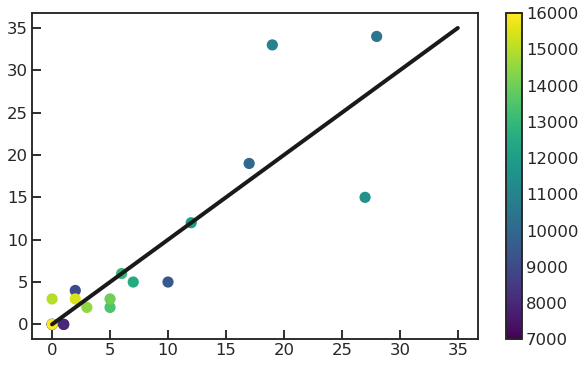

In [104]:
plt.scatter(
    np.histogram(sn_data_with_z['v_siII'][sn_data_with_z['z'] > z_median], bins)[0],
    np.histogram(sn_data_with_z['v_siII'][sn_data_with_z['z'] <= z_median], bins)[0],
    c=bins[:-1],
    cmap='viridis'
)
plt.colorbar()

plt.plot([0, 35], [0, 35], color='k', linewidth=4)

Text(0, 0.5, 'Difference in Proportion of Data (%) \n $(> z_{50}) - (\\leq z_{50})$')

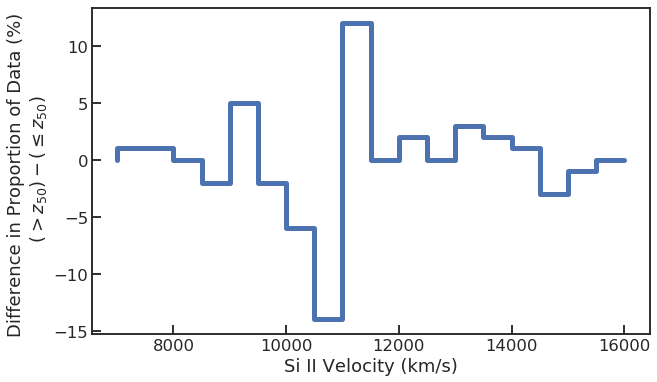

In [127]:
plt.step(
    bins[:-1],
    np.histogram(sn_data_with_z['v_siII'][sn_data_with_z['z'] > z_median], bins)[0] - \
    np.histogram(sn_data_with_z['v_siII'][sn_data_with_z['z'] <= z_median], bins)[0]
)
plt.xlabel('Si II Velocity (km/s)')
plt.ylabel('Difference in Proportion of Data (%) \n $(> z_{50}) - (\leq z_{50})$')
